# Exploratory data analysis on raw dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import geopandas as gpd
import utils.constants as c
from pathlib import Path
import numpy as np

In [2]:
df_complete_dataset = pd.read_csv(
    "../data/raw/complete_dataset.csv", index_col="datetime", parse_dates=["datetime"]
)
df_station_metadata = pd.read_csv(
    "../data/raw/station_metadata.csv", index_col="id", dtype={"id": str}
)

KeyboardInterrupt: 

## Basic information of dataset

In [ ]:
df_complete_dataset.describe()

,air_pressure_00183,air_pressure_00591,air_pressure_01694,air_pressure_01759,air_pressure_02429,air_pressure_03032,air_pressure_03897,air_pressure_04271,air_pressure_04393,air_pressure_04625,...,wind_speed_01759,wind_speed_02429,wind_speed_03032,wind_speed_03897,wind_speed_04271,wind_speed_04393,wind_speed_04625,wind_speed_05516,wind_speed_05930,wind_speed_06163
count,823216.000000,824146.000000,823630.000000,821454.000000,821104.000000,822929.000000,821669.000000,823667.000000,821110.000000,822315.000000,...,814629.000000,800785.000000,800463.000000,821359.000000,822432.000000,823640.000000,803344.000000,823132.000000,822316.000000,817058.000000
mean,1009.379010,1009.505798,1007.685652,1013.185438,1011.589939,1010.438713,1014.355499,1013.203534,1013.011707,1007.378163,...,6.744363,2.941195,7.234545,4.426667,4.729058,6.332377,3.749227,6.190847,5.297345,3.673670
std,9.881224,9.600447,9.526648,9.730788,9.985446,10.572170,9.892455,9.805342,10.254266,9.645144,...,3.443237,1.756336,3.291134,2.430038,2.742768,3.258753,1.965588,3.252802,2.866283,2.114072
min,963.300000,962.500000,960.000000,966.800000,966.500000,964.200000,969.700000,968.900000,967.600000,960.200000,...,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1003.400000,1003.700000,1001.900000,1007.300000,1005.600000,1004.100000,1008.400000,1007.300000,1006.900000,1001.600000,...,4.100000,1.600000,4.800000,2.600000,2.800000,3.800000,2.300000,3.700000,3.200000,2.100000
50%,1010.000000,1010.100000,1008.200000,1013.700000,1012.200000,1011.200000,1014.900000,1013.800000,1013.700000,1007.900000,...,6.200000,2.700000,6.900000,4.000000,4.100000,5.800000,3.400000,5.700000,4.800000,3.400000
75%,1015.900000,1015.700000,1013.800000,1019.500000,1018.100000,1017.500000,1020.700000,1019.600000,1019.700000,1013.600000,...,8.900000,4.000000,9.300000,5.800000,5.900000,8.300000,4.800000,8.100000,6.900000,4.900000
max,1043.500000,1042.200000,1040.100000,1046.500000,1045.300000,1046.200000,1048.200000,1046.700000,1047.400000,1040.400000,...,26.800000,16.600000,30.700000,20.200000,26.800000,32.800000,18.400000,27.600000,27.200000,19.000000


In [ ]:
df_complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 825146 entries, 2008-04-24 00:00:00 to 2023-12-31 00:00:00
Data columns (total 78 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   air_pressure_00183       823216 non-null  float64
 1   air_pressure_00591       824146 non-null  float64
 2   air_pressure_01694       823630 non-null  float64
 3   air_pressure_01759       821454 non-null  float64
 4   air_pressure_02429       821104 non-null  float64
 5   air_pressure_03032       822929 non-null  float64
 6   air_pressure_03897       821669 non-null  float64
 7   air_pressure_04271       823667 non-null  float64
 8   air_pressure_04393       821110 non-null  float64
 9   air_pressure_04625       822315 non-null  float64
 10  air_pressure_05516       824329 non-null  float64
 11  air_pressure_05930       822822 non-null  float64
 12  air_pressure_06163       819725 non-null  float64
 13  air_temperature_00183    

## Missing values

Count missing total missing values

In [ ]:
total_number_of_values = df_complete_dataset.size
total_number_of_missing_values = df_complete_dataset.isna().sum().sum()
percentage_of_missing_values = (
    total_number_of_missing_values / total_number_of_values
) * 100

print(f"Total number of values: {total_number_of_values}")
print(f"Total number of missing values: {total_number_of_missing_values}")
print(f"Percentage of missing values: {percentage_of_missing_values}")

Total number of values: 64361388
Total number of missing values: 856449
Percentage of missing values: 1.3306875855443017


Count missing values per column

In [ ]:
number_of_missing_values_per_column = df_complete_dataset.isna().sum()
percentage_of_missing_values_per_column = (
    number_of_missing_values_per_column / len(df_complete_dataset)
) * 100

missing_values_per_column_stats = pd.DataFrame(
    {
        "Missing Count": number_of_missing_values_per_column,
        "Missing Percent": percentage_of_missing_values_per_column,
    }
)

print("Missing values for each column (10 columns with the highest ratio of missing values):")
print(missing_values_per_column_stats.sort_values(by="Missing Percent", ascending=False)[:10])

Missing values for each column (10 columns with the highest ratio of missing values):
                 Missing Count  Missing Percent
dew_point_04393          64934         7.869395
dew_point_05516          64904         7.865760
dew_point_04271          64761         7.848429
dew_point_02429          59155         7.169034
dew_point_04625          44332         5.372625
dew_point_03897          31715         3.843562
dew_point_06163          31074         3.765879
dew_point_03032          30767         3.728673
dew_point_01759          30629         3.711949
dew_point_00183          28971         3.511015


Count missing values per station

In [ ]:
missing_values_per_station_stats = {}

for col in df_complete_dataset.columns:
    station_id = col.split("_")[-1]
    missing_values_per_station_stats.setdefault(
        station_id, {"Missing Count": 0, "Missing Percent": 0}
    )

    num_missing_values = df_complete_dataset[col].isna().sum()
    missing_values_per_station_stats[station_id][
        "Missing Count"
    ] += num_missing_values

number_of_columns_per_station = len(missing_values_per_station_stats)
number_of_values_per_station = total_number_of_values / number_of_columns_per_station

for station_id in missing_values_per_station_stats.keys():
    num_missing_values = missing_values_per_station_stats[station_id][
        "Missing Count"
    ]
    missing_values_per_station_stats[station_id]["Missing Percent"] = (
        num_missing_values / number_of_values_per_station
    ) * 100

missing_values_per_station_stats_df = pd.DataFrame(
    missing_values_per_station_stats
).transpose()

print("Missing values for each station:")
print(
    missing_values_per_station_stats_df.sort_values(
        by="Missing Percent", ascending=False
    )
)

Missing values for each station:
       Missing Count  Missing Percent
02429       119771.0         2.419188
04625        96583.0         1.950826
03032        87613.0         1.769646
04271        75002.0         1.514924
04393        74477.0         1.504320
05516        72167.0         1.457661
06163        63669.0         1.286015
01759        61933.0         1.250950
03897        48945.0         0.988613
00183        44653.0         0.901921
05930        41013.0         0.828399
01694        38664.0         0.780953
00591        31959.0         0.645522


Check missing values for the reference station

In [ ]:
print("Missing Values for reference station:")
print(
    missing_values_per_column_stats.loc[
        missing_values_per_column_stats.index.str.contains("03897")
    ]
)

Missing Values for reference station:
                         Missing Count  Missing Percent
air_pressure_03897                3477         0.421380
air_temperature_03897             2649         0.321034
dew_point_03897                  31715         3.843562
relative_humidity_03897           3663         0.443921
wind_direction_03897              3654         0.442831
wind_speed_03897                  3787         0.458949


Check for skipped timestamps


In [ ]:
expected_freq = pd.date_range(
    start=df_complete_dataset.index.min(),
    end=df_complete_dataset.index.max(),
    freq="10min",
)
missing_timestamps = expected_freq.difference(df_complete_dataset.index)
print(f"Number of missing timestamps: {len(missing_timestamps)}")

Number of missing timestamps: 0


## Explore reference station

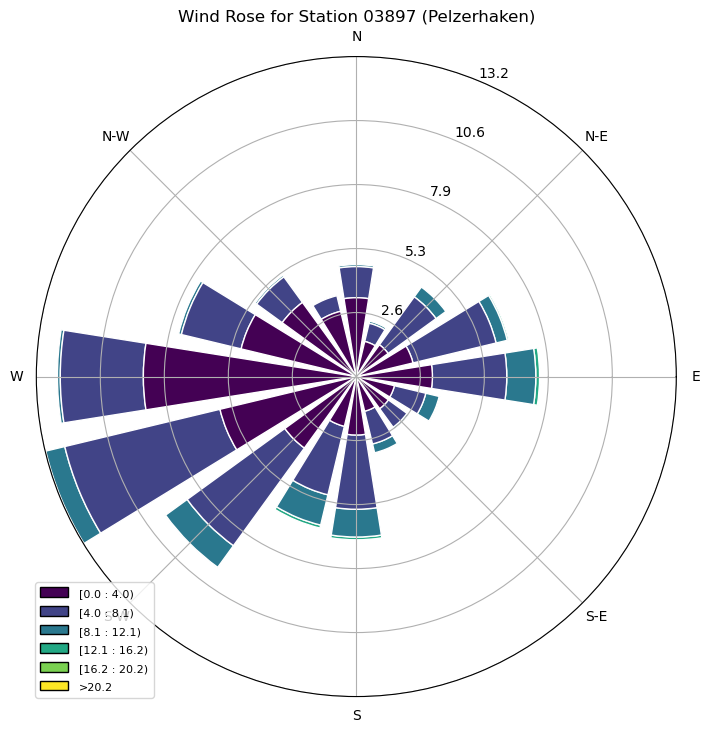

In [ ]:

reference_wind_direction_column = f"wind_direction_{c.REFERENCE_STATION_ID}"
reference_wind_speed_column = f"wind_speed_{c.REFERENCE_STATION_ID}"

df_reference_wind = df_complete_dataset[
    [reference_wind_direction_column, reference_wind_speed_column]
].dropna()

station_name = df_station_metadata.loc[c.REFERENCE_STATION_ID, "name"]

wind_rose_fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=wind_rose_fig)
ax.bar(
    df_reference_wind[reference_wind_direction_column],
    df_reference_wind[reference_wind_speed_column],
    normed=True,
    opening=0.8,
    edgecolor="white",
)

ax.set_legend()

plt.title(f"Wind Rose for Station {c.REFERENCE_STATION_ID} ({station_name})")
plt.show()

## Visualize station locations

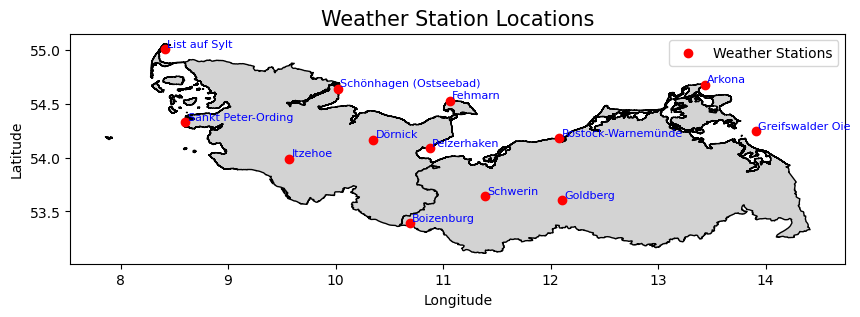

In [ ]:
gdf_stations = gpd.GeoDataFrame(
    df_station_metadata,
    geometry=gpd.GeoSeries.from_xy(
        df_station_metadata.geographic_longitude,
        df_station_metadata.geographic_latitude,
    ),
)

germany = gpd.read_file("shape_files/gadm41_DEU_shp/gadm41_DEU_1.shp")
schleswig_holstein = germany[germany.NAME_1 == "Schleswig-Holstein"]
meck_pom = germany[germany.NAME_1 == "Mecklenburg-Vorpommern"]

fig, ax = plt.subplots(figsize=(10, 10))

schleswig_holstein.plot(ax=ax, color="lightgray", edgecolor="black")
meck_pom.plot(ax=ax, color="lightgray", edgecolor="black")

gdf_stations.plot(ax=ax, color="red", marker="o", label="Weather Stations")

for x, y, label in zip(
    gdf_stations.geometry.x, gdf_stations.geometry.y, gdf_stations["name"]
):
    ax.text(x + 0.02, y + 0.02, label, fontsize=8, ha="left", color="blue")

ax.set_title("Weather Station Locations", fontsize=15)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.legend()

plt.show()